# SPICY Catalog - cross-match with ALMA-IMF

https://ui.adsabs.harvard.edu/abs/2020arXiv201112961K/abstract

In [21]:
%matplotlib inline
import pylab as pl
import numpy as np
pl.style.use('dark_background')
pl.rcParams['font.size'] = 16

## Part 1: Find which SPICY sources are in ALMA-IMF

In [2]:
from astropy.io import fits
from astropy.table import Table

In [3]:
tbl = Table.read('https://sites.astro.caltech.edu/~mkuhn/SPICY/table1.fits')

In [4]:
tbl

<Table length=117446>
SPICY      ra        dec         l          b        p1      p2      p3     class   silicate  pah  ...  m4_5  m5_8  m8_0       2MASS               UKIDSS       VIRAC       GaiaDR2              MIPS              AllWISE             ZTFDR3    
          deg        deg        deg        deg                                                     ...                                                                                                                                           
int64   float64    float64    float64    float64  float32 float32 float32   bytes9    bool    bool ... int32 int32 int32      bytes18             bytes19       int32        int64             bytes18             bytes20             int64     
------ ---------- ---------- ---------- --------- ------- ------- ------- --------- -------- ----- ... ----- ----- ----- ------------------ ------------------- ----- ------------------- ------------------ -------------------- ---------------
     1 125.664811 -37.551349 255.975183 -0.253369    0.71      --      -- ClassII      False False ...     2     2     2 08223956-3733048                          -- 5541983493883598976                    J082239.55-373304.5               --
     2 125.795513    -37.585  256.06207 -0.187675    0.69      --      -- ClassII      False False ...     2     2     2 08231092-3735060                          -- 5541980848188474496                    J082310.90-373505.9               --
     3 125.860244 -37.577463 256.085297 -0.141319    0.87      --      -- FS           False False ...     2     2     2 08232646-3734388                          -- 5541969475116705664                    J082326.45-373438.8               --
     4 125.946863 -37.770809 256.282985 -0.196119    0.53      --      -- ClassI       False False ...     4     2     4                                           --                  --                    J082347.25-374615.0               --
     5 126.003155 -37.126075 255.780917  0.210831    0.54      --      -- FS           False False ...     2     2     2 08240071-3707341                          -- 5542020537982099840                    J082400.75-370733.7               --
     6   126.1733 -38.104664 256.658808 -0.242061    0.73      --      -- ClassII      False False ...     2     2     2                                           --                  --                    J082441.57-380616.8               --
     7 126.301474  -37.89513 256.545885 -0.038703    0.74      --      -- ClassII      False False ...     2     2     2 08251235-3753424                          -- 5541764656715605632                    J082512.35-375342.2               --
     8 126.307182 -38.226459 256.819016 -0.226317    0.66      --      -- FS           False False ...     2     2     2 08251369-3813351                          -- 5541703427661554560                    J082513.74-381335.5               --
     9 126.309578 -38.229803 256.822833 -0.226711    0.88      --      -- FS           False False ...     2     2     2 08251429-3813472                          --                  --                    J082514.29-381347.2               --
    10 126.317603  -38.24014 256.834913 -0.227533    0.64      --      -- ClassII      False False ...     2     2     2 08251623-3814245                          -- 5541703221503118336                    J082516.23-381424.6               --
    11 126.319181 -38.243167   256.8381 -0.228269    0.73      --      -- FS           False False ...     2     2     2 08251661-3814354                          --                  --                                                      --
    12 126.320961  -38.32668  256.90709 -0.275353    0.81      --      -- ClassI       False False ...     2     3     2                                           --                  --                    J082517.00-381936.3               --
    13 126.321804 -38.193211 256.798504 -0.197739    0.58      --      -- FS           False False ...    

In [5]:
from astropy.coordinates import SkyCoord
from astropy import units as u
coords = SkyCoord(tbl['l'], tbl['b'], frame='galactic', unit=(u.deg, u.deg))
coords

<SkyCoord (Galactic): (l, b) in deg
    [(255.975183, -0.253369), (256.06207 , -0.187675),
     (256.085297, -0.141319), ..., (110.208963,  0.115081),
     (110.214168,  0.113614), (110.21706 ,  0.104861)]>

In [6]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from spectralindex import prefixes

In [7]:
from spectral_cube import SpectralCube

In [8]:
basedir = '/orange/adamginsburg/ALMA_IMF/releases/June2021Release/'

In [9]:
import os
os.chdir(basedir)

for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    print(fieldid, cube.wcs.celestial.wcs.crval)

G328 [239.49866667 -53.96595372]
G333 [245.539      -50.10024221]
G12 [273.55570833 -17.92977074]
W51IRS2 [290.915875    14.51763881]
G008 [271.58779796 -21.62078966]
G327 [238.283875   -54.61905514]
G10 [272.62016667 -19.93008323]
G337 [250.29425    -47.13413857]
G338 [250.14341667 -45.69461081]
G351 [261.67758333 -36.15624261]
G353 [262.6095     -34.69768705]
W43MM3 [281.92274999  -2.00766664]
W43MM2 [281.90254166  -2.01419442]
W43MM1 [281.94583332  -1.9072222 ]
W51-E [290.93408333  14.50819437]


In [10]:
import os
os.chdir(basedir)

prefixes['W43MM1'] = dict(
    finaliter_prefix_b3="W43-MM1/B3/cleanest/W43-MM1_B3_uid___A001_X1296_X1af_continuum_merged_12M_robust0_selfcal4_finaliter",
    finaliter_prefix_b6="W43-MM2/B6/cleanest/W43-MM2_B6_uid___A001_X1296_X113_continuum_merged_12M_robust0_selfcal5_finaliter",)

for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)
    print(f"{fieldid}: {matches.sum()}")

G328: 17
G333: 2
G12: 11
W51IRS2: 4
G008: 13
G327: 6
G10: 8
G337: 10
G338: 5
G351: 21
G353: 11
W43MM3: 6
W43MM2: 6
W43MM1: 2
W51-E: 2


In [11]:
for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)
    print(f"{fieldid}: {matches.sum()}")
    print(tbl[matches][['SPICY','p1','class','UKIDSS','VIRAC']])
    print()

G328: 17
SPICY  p1    class          UKIDSS         VIRAC  
----- ---- --------- ------------------- ---------
31362   -- uncertain                     336878763
31366 0.71 FS                            336878800
31367 0.76 FS                            336993608
31389 0.66 ClassII                       336879047
31390   -- uncertain                     336879062
31395 0.91 FS                                   --
31405   -- uncertain                     336879094
31415  0.9 ClassI                        337085859
31420 0.84 ClassII                              --
31423 0.56 ClassI                        337085862
31431 0.87 ClassI                        337085901
31432  0.8 uncertain                            --
31438 0.82 FS                                   --
31441   -- uncertain                     337036104
31444   -- uncertain                     337036046
31453 0.55 ClassI                        337286988
31463 0.55 uncertain                            --

G333: 2
SPICY  p1    

# Show the sources on the ALMA-IMF cutouts

In [12]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis')

In [13]:
import spitzer_plots
from spitzer_plots import show_fov_on_spitzer, contour_levels
from spectralindex import prefixes
from spectral_cube import SpectralCube
from astropy import coordinates

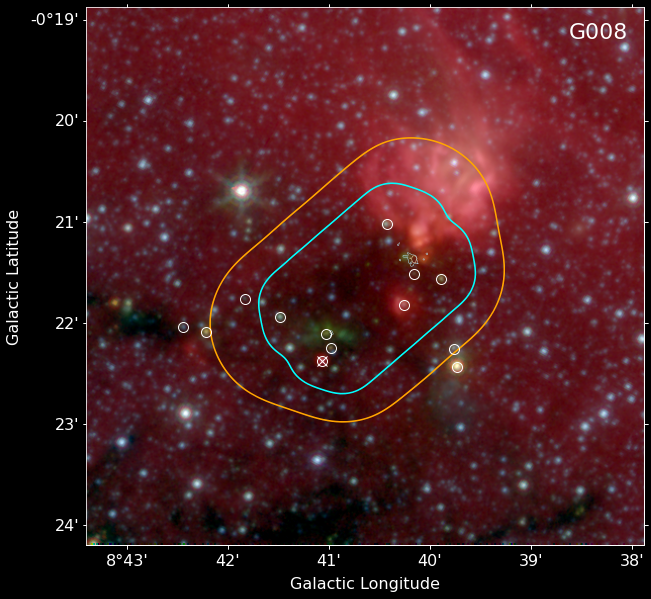

In [14]:
fieldid = 'G008'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )
cc2 = coordinates.SkyCoord(8.684464,	-0.372956, unit=(u.deg, u.deg), frame='galactic')
ax.plot(cc2.fk5.ra.deg, cc2.fk5.dec.deg, 'wx', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

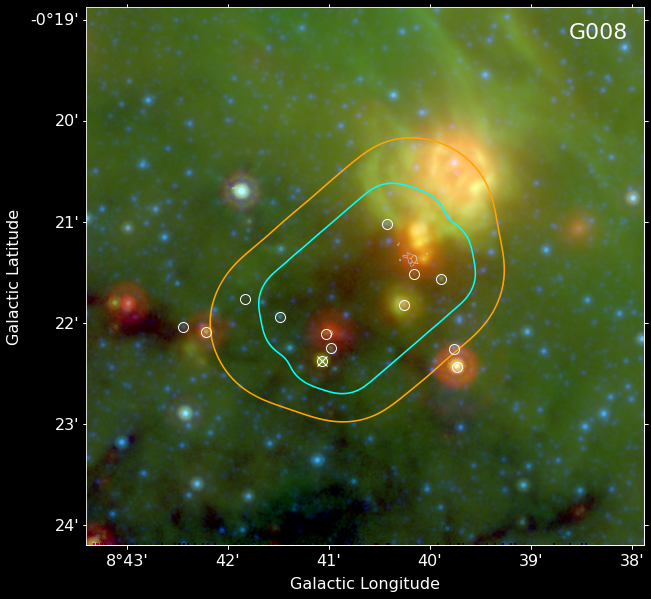

In [15]:
fieldid = 'G008'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid], mips=True)


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )
cc2 = coordinates.SkyCoord(8.684464,	-0.372956, unit=(u.deg, u.deg), frame='galactic')
ax.plot(cc2.fk5.ra.deg, cc2.fk5.dec.deg, 'wx', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

In [16]:
from astropy import coordinates

In [17]:
coordinates.SkyCoord(8.684464,	-0.372956, unit=(u.deg, u.deg), frame='galactic').to_string('dms')

'8d41m04.0704s -0d22m22.6416s'

In [18]:
tbl[matches].show_in_notebook()

In [19]:
thistbl = tbl[matches]
MIPS_IDs = thistbl['MIPS']

In [22]:
np.array(['MG' in mid for mid in MIPS_IDs])

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False])

In [23]:
MIPS_IDs

<Column name='MIPS' dtype='bytes18' length=13>
                  
                  
                  
                  
                  
                  
                  
                  
                  
                  
MG008.6844-00.3730
MG008.7035-00.3682

In [24]:
MIPS_IDs = thistbl['MIPS']
MIPS_IDs_mask = MIPS_IDs == '                  '
MIPS_IDs_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True])

In [25]:
",".join(map(str, MIPS_IDs[~MIPS_IDs_mask]))
# "MG008.6844-00.3730,MG008.7035-00.3682"

'MG008.6844-00.3730,MG008.7035-00.3682'

In [27]:
from astroquery.vizier import Vizier

In [49]:
mipsgal_tbl = Vizier(row_limit=1000).query_constraints(MIPSGAL="=,"+(",".join(map(str, MIPS_IDs[~MIPS_IDs_mask]))),
                                                       catalog='J/AJ/149/64/catalog')[0]
mipsgal_tbl

<Table length=2>
     MIPSGAL        RAJ2000    DEJ2000     S24     __24_    Jmag    Hmag    Kmag   __3.6_  __4.5_  __5.8_  __8.0_   dNN     FWHM 
                      deg        deg       mJy      mag     mag     mag     mag     mag     mag     mag     mag    arcsec  arcsec
      str18         float64    float64   float64  float32 float32 float32 float32 float32 float32 float32 float32 float32 float32
------------------ ---------- ---------- -------- ------- ------- ------- ------- ------- ------- ------- ------- ------- -------
MG008.7035-00.3682 271.608769 -21.601676  600.561    2.71      --      --      --  12.111   9.751   8.491   8.070   18.11    6.12
MG008.6844-00.3730 271.603263 -21.620660  150.080    4.22      --      --      --  12.335  12.064   9.212   7.448   18.56    6.24

In [29]:
thistbl[~MIPS_IDs_mask]

<Table length=2>
SPICY     ra        dec        l         b        p1      p2      p3     class   silicate  pah  ...  m3_6  m4_5  m5_8  m8_0       2MASS               UKIDSS         VIRAC   GaiaDR2        MIPS              AllWISE        ZTFDR3
         deg        deg       deg       deg                                                     ...                                                                                                                                
int64  float64    float64   float64   float64  float32 float32 float32   bytes9    bool    bool ... int32 int32 int32 int32      bytes18             bytes19         int32    int64       bytes18             bytes20        int64 
----- ---------- ---------- -------- --------- ------- ------- ------- --------- -------- ----- ... ----- ----- ----- ----- ------------------ ------------------- --------- ------- ------------------ -------------------- ------
73683 271.603133 -21.620625 8.684464 -0.372956    0.02      --    0.62 ClassI       False  True ...     3     3     3     3                                        205756482      -- MG008.6844-00.3730                          --
73695 271.608717 -21.601685 8.703531 -0.368247    0.91      --    0.65 ClassI       False False ...     3     3     3     3                                        205845452      -- MG008.7035-00.3682 J180626.05-213605.4      --

In [31]:
from astropy import table

In [32]:
mips_match = Vizier(row_limit=1000, columns=["MIPSGAL", "S24", "e_S24"]).query_constraints(MIPSGAL="=,"+(",".join(map(str, MIPS_IDs[~MIPS_IDs_mask]))),
                                                       catalog='J/AJ/149/64/catalog')[0]
mips_match.rename_column('MIPSGAL','MIPS')
mips_sed_tbl = table.join(thistbl[~MIPS_IDs_mask], mips_match, join_type='left')
mips_sed_tbl.show_in_notebook()

In [50]:
this_plus_mips = table.join(thistbl, mips_match, join_type='left')
this_plus_mips

<Table length=21>
SPICY     ra        dec         l          b        p1      p2      p3     class   silicate  pah  ...  m5_8  m8_0       2MASS               UKIDSS         VIRAC   GaiaDR2        MIPS              AllWISE        ZTFDR3   S24    e_S24 
         deg        deg        deg        deg                                                     ...                                                                                                                       mJy     mJy  
int64  float64    float64    float64    float64  float32 float32 float32   bytes9    bool    bool ... int32 int32      bytes18             bytes19         int32    int64        str18              bytes20        int64  float64 float32
----- ---------- ---------- ---------- --------- ------- ------- ------- --------- -------- ----- ... ----- ----- ------------------ ------------------- --------- ------- ------------------ -------------------- ------ ------- -------
54167 261.652251 -36.167927 351.752496 -0.526919      --      --    0.91 uncertain    False False ...     2     0                                        190355725      --                                             --      --      --
54265 261.705651 -36.149799 351.791596 -0.552586      --      --    0.81 uncertain     True False ...     3     3                                        190657839      --                                             --      --      --
54255 261.697831 -36.160975 351.778798 -0.553578      --      --    0.92 uncertain    False False ...     0     0                                        190657174      --                                             --      --      --
54254 261.697546 -36.157219 351.781787 -0.551292    0.89      --      -- uncertain     True False ...     4     2                                               --      --                                             --      --      --
54251 261.696805  -36.17938 351.763059 -0.563156    0.69      --    0.13 ClassII      False False ...     2     3                                        190656270      --                                             --      --      --
54235 261.689581 -36.148292 351.785609 -0.540975     1.0      --    0.97 ClassII      False False ...     4     3                                        191219949      --                                             --      --      --
54233 261.688301  -36.17784 351.760508   -0.5566    0.86      --    0.71 ClassII      False False ...     3     3                                        190656102      --                                             --      --      --
54228  261.68733 -36.148392 351.784512 -0.539522    0.91      --      -- ClassII      False False ...     3     3                                               --      --                                             --      --      --
54224 261.682255 -36.166349 351.767322 -0.546139      --      --    0.76 uncertain    False False ...     2     0                                        190656529      --                                             --      --      --
54221 261.681976 -36.144995  351.78492 -0.534039    0.72      --    0.03 ClassI       False False ...     2     1                                        191339259      --                                             --      --      --
54222 261.682114 -36.147398 351.782987 -0.535472    0.95      --    0.63 ClassII      False False ...     3     3 17264369-3608503                       191219887      --                                             --      --      --
54212 261.678557 -36.143122 351.784934 -0.530703    0.54      --    0.74 FS           False False ...     3     3 17264284-3608351                       190657501      --                    J172642.84-360835.0      --      --      --
54207 261.676801 -36.157759 351.771995 -0.537692      --      --    0.57 uncertain    False False ...     0     0                                        191219648      --                                             --      --      --
5420

In [34]:
mips_match

<Table length=2>
       MIPS          S24     e_S24 
                     mJy      mJy  
      str18        float64  float32
------------------ -------- -------
MG008.7035-00.3682  600.561  13.043
MG008.6844-00.3730  150.080   2.765

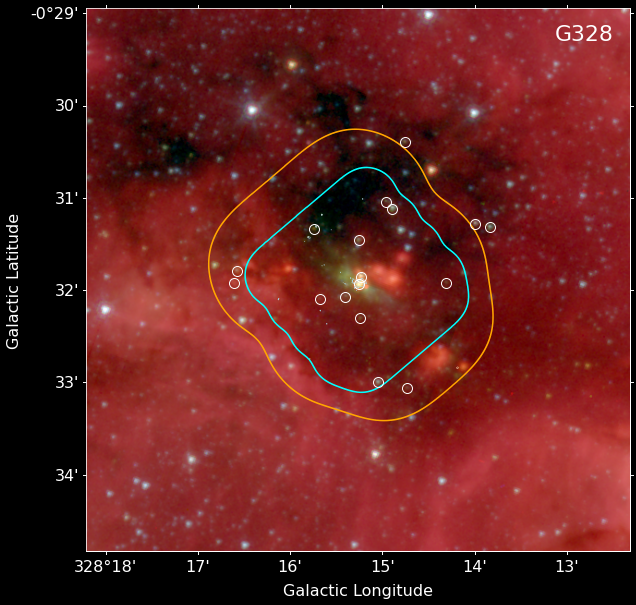

In [35]:
fieldid = 'G328'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

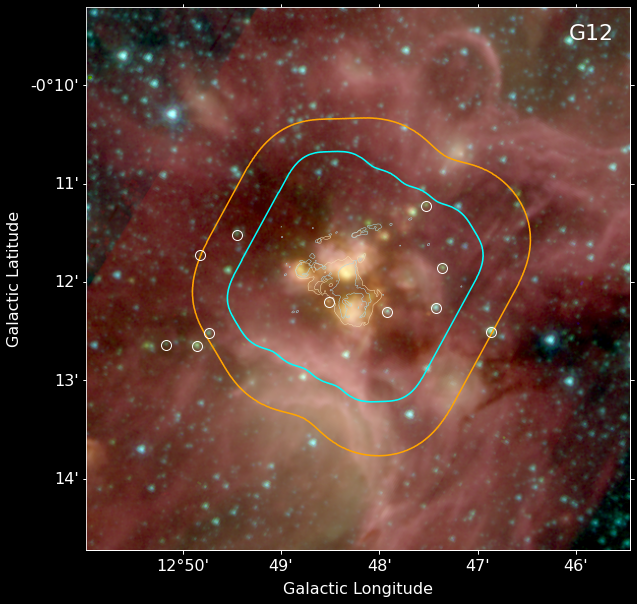

In [36]:
fieldid = 'G12'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

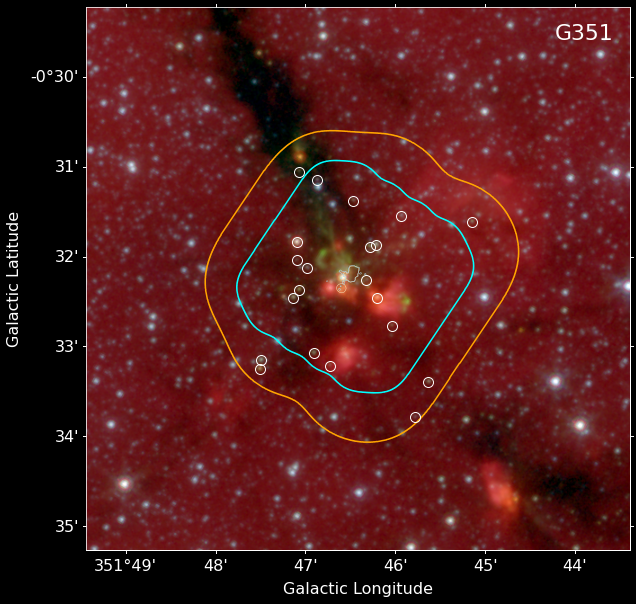

In [37]:
fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

In [38]:
tbl[matches].show_in_notebook()

In [39]:
from astroquery.vizier import Vizier
from astroquery.svo_fps import SvoFps

In [40]:
from astropy import table

# Obtain VVV "VIRAC" YZJHK magnitudes to go along with the Spitzer magnitudes

This grabs the rows of the VIRAC table matched in SPICY and merges them.

In [52]:
thistbl = tbl[matches]
virac_numbers = thistbl['VIRAC']
virac_match = Vizier(row_limit=1000).query_constraints(srcid=",".join(map(str, virac_numbers[~virac_numbers.mask])),
                                                       catalog='II/364/virac')[0]
virac_match.rename_column('srcid','VIRAC')

sed_tbl = table.join(thistbl[~virac_numbers.mask], virac_match, join_type='left')

sed_tbl.show_in_notebook()

In [55]:
MIPS_IDs = sed_tbl['MIPS']
MIPS_IDs_mask = MIPS_IDs == '                  '
if any (~MIPS_IDs_mask):

    mips_match = Vizier(row_limit=1000, columns=["MIPSGAL", "S24", "e_S24"]).query_constraints(MIPSGAL="=,"+(",".join(map(str, MIPS_IDs[~MIPS_IDs_mask]))),
                                                           catalog='J/AJ/149/64/catalog')[0]
    mips_match.rename_column('MIPSGAL','MIPS')
    mips_sed_tbl = table.join(sed_tbl[~MIPS_IDs_mask], mips_match, join_type='left')
    mips_sed_tbl.show_in_notebook()
else:
    mips_sed_tbl = sed_tbl
    mips_sed_tbl['S24'] = np.nan * np.zeros(len(sed_tbl))
    mips_sed_tbl['e_S24'] = np.nan * np.zeros(len(sed_tbl))

In [134]:
avgs>0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [59]:
# hacky function to extract the rows of an SED table as a plottable entry
def getrow(tb, rownum, keys=['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0', 'S24']):
    return np.array([tb[rownum][key] for key in keys])

In [60]:
magcols = ['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0', 'S24',]
emagcols = ['Yell', 'Zell', 'Jell', 'Hell', 'KsEll','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0', 'e_S24']

# these are the official filternames on SVO_FPS
filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
               'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu']
filter_meta = table.vstack([SvoFps.get_filter_list(facility='Paranal', instrument='VIRCAM'),
                            SvoFps.get_filter_list(facility='Spitzer', instrument='IRAC'),
                            SvoFps.get_filter_list(facility='Spitzer', instrument='MIPS')[0],
                           ])
zpts = {filtername: filter_meta[filter_meta['filterID']==filtername]['ZeroPoint'] for filtername in filternames}
wavelengths = [np.average(SvoFps.get_transmission_data(filtername)['Wavelength'],
                          weights=SvoFps.get_transmission_data(filtername)['Transmission'])
              for filtername in filternames]

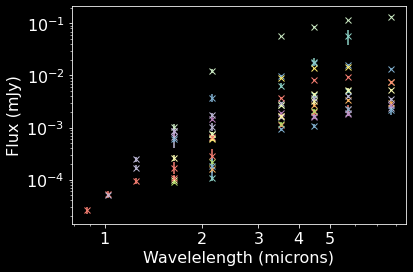

In [61]:
sed = sed_tbl[magcols]
esed = sed_tbl[emagcols]
zps = np.array([zpts[fn] for fn in filternames], dtype='float').squeeze()*u.Jy

for rownum in range(len(sed)):
    flx = zps.value * 10**(getrow(sed, rownum)/-2.5)
    err = getrow(esed, rownum, emagcols) / 1.09 * flx
    pl.errorbar(np.array(wavelengths)/1e4, flx, yerr=err, marker='x', linestyle='none')
_=pl.loglog()
_=pl.gca().set_xticks([1,2,3,4,5])
_=pl.gca().set_xticklabels([1,2,3,4,5])
_=pl.xlabel("Wavelelength (microns)")
_=pl.ylabel("Flux (mJy)")

# Follow docs to fit SEDs

https://sedfitter.readthedocs.io/en/stable/fitting.html

In [68]:
robitaille_modeldir = '/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/'

In [63]:
from sedfitter import fit, Fitter

In [64]:
# https://sedfitter.readthedocs.io/en/stable/convolution.html
from sedfitter.filter import Filter
from astroquery.svo_fps import SvoFps

# these are the official filternames on SVO_FPS
filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
               'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu',
               'Herschel/Pacs.blue', 'Herschel/Pacs.red', 'Herschel/SPIRE.PSW', 'Herschel/SPIRE.PMW', 'Herschel/SPIRE.PLW'
              ]



filtercurves = {filtername: SvoFps.get_transmission_data(filtername) for filtername in filternames}
wavelengths = [np.average(filtercurves[filtername]['Wavelength'],
                          weights=filtercurves[filtername]['Transmission'])
              for filtername in filternames]
wavelength_dict = {filtername: np.average(filtercurves[filtername]['Wavelength'],
                                          weights=filtercurves[filtername]['Transmission'])*u.AA
                   for filtername in filternames}

filterfreqs = {filtername: u.Quantity(filtercurves[filtername]['Wavelength'], u.AA).to(u.Hz, u.spectral()) for filtername in filternames}
filtertrans = {filtername: np.array(filtercurves[filtername]['Transmission'])[np.argsort(filterfreqs[filtername])]
              for filtername in filternames}
filterfreqs = {filtername: np.sort(filterfreqs[filtername]) for filtername in filternames}

sed_filters = [Filter(name=filtername,
                      central_wavelength=wl*u.AA,
                      nu=filterfreqs[filtername],
                      response=filtertrans[filtername])
               for filtername, wl in zip(filternames, wavelengths)]

almaimf_bandends_1mm = [[216.10085679, 216.36181569],
                        [217.05104378, 217.31175857],
                        [219.90488464, 220.04866835],
                        [218.13102322, 218.39222624],
                        [219.51976276, 219.66379059],
                        [230.31532951, 230.81137113],
                        [231.06503709, 231.56181105],
                        [231.52507012, 233.42623749]]*u.GHz
nu_1mm = np.linspace(almaimf_bandends_1mm.min(), almaimf_bandends_1mm.max(), 5000)
response_1mm = np.zeros(nu_1mm.size, dtype='bool')
for start, stop in almaimf_bandends_1mm:
    response_1mm |= (nu_1mm > start) & (nu_1mm < stop)
sed_filters.append(Filter(name='ALMA-IMF_1mm',
                          central_wavelength=(228.15802*u.GHz).to(u.mm, u.spectral()),
                          nu=nu_1mm,
                          response=response_1mm.astype(float),
                         ))

for filterfunc in sed_filters:
    filterfunc.normalize()


almaimf_bandends_3mm = [[ 93.13410936,  93.25141259],
                        [ 91.75059068,  92.68755174],
                        [102.15273354, 103.0896946 ],
                        [104.55323851, 105.49019957]]*u.GHz
nu_3mm = np.linspace(almaimf_bandends_3mm.min(), almaimf_bandends_3mm.max(), 5000)
response_3mm = np.zeros(nu_3mm.size, dtype='bool')
for start, stop in almaimf_bandends_3mm:
    response_3mm |= (nu_3mm > start) & (nu_3mm < stop)
sed_filters.append(Filter(name='ALMA-IMF_3mm',
                          central_wavelength=(99.68314596*u.GHz).to(u.mm, u.spectral()),
                          nu=nu_3mm,
                          response=response_3mm.astype(float),
                         ))

wavelength_dict['ALMA-IMF_1mm'] = (228.15802*u.GHz).to(u.um, u.spectral())
wavelength_dict['ALMA-IMF_3mm'] = (99.68314596*u.GHz).to(u.um, u.spectral())

In [65]:
sed_filters

# Convolve the models

This should be done somewhere else, not in this code.

```
from sedfitter.convolve import convolve_model_dir

for geometry in geometries:
    for model_dir in f'{robitaille_modeldir}/{geometry}':
        convolve_model_dir(model_dir, sed_filters)
```

In [66]:
robitaille_modeldir

'/blue/adamginsburg/richardson.t/research/flux/robitaille_models/'

In [76]:
sed

<Table length=15>
  Ymag    Zmag    Jmag    Hmag   Ksmag   mag3_6  mag4_5  mag5_8  mag8_0   S24  
  mag     mag     mag     mag     mag     mag     mag     mag     mag          
float64 float64 float32 float64 float32 float32 float32 float32 float32 float64
------- ------- ------- ------- ------- ------- ------- ------- ------- -------
     --      --      --      --  16.995  12.524  11.579  10.881      --     nan
     --      --      --  17.536  15.061  12.524  11.513  10.817  10.214     nan
     --      --  17.394  15.478  14.504  13.106  12.563  11.926  11.061     nan
 18.988  19.851  18.023  16.944  15.923  13.482  12.394  11.732      --     nan
     --      --      --  15.581  13.108  11.105   10.03   9.619   9.211     nan
     --      --      --      --  16.532  13.022  12.044  11.329  10.839     nan
     --      --      --  17.643  16.226  13.443  12.322      --      --     nan
     --      --      --  15.206  14.145  12.898  12.639   11.97  10.916     nan
     --      --      --  14.991  11.827    9.22   8.273   7.478   6.686     nan
     --      --      --      --  15.095   11.21   10.28   9.713   9.824     nan
     --      --      --      --  14.880  11.579   9.959   8.265      --     nan
     --      --      --  16.471  14.856  13.054  11.859      --      --     nan
 19.019      --  16.981  15.173  13.949  12.401  11.706  11.144  10.652     nan
     --      --      --  17.445  14.980  12.198  10.828  10.213   9.845     nan
     --      --      --      --  16.417  13.681  13.059  11.737  11.159     nan

In [75]:
filters, apertures, len(filters), len(apertures), len(sed), len(esed), len(flx), len(data)

(['Paranal/VISTA.Y',
  'Paranal/VISTA.Z',
  'Paranal/VISTA.J',
  'Paranal/VISTA.H',
  'Paranal/VISTA.Ks',
  'Spitzer/IRAC.I1',
  'Spitzer/IRAC.I2',
  'Spitzer/IRAC.I3',
  'Spitzer/IRAC.I4',
  'Spitzer/MIPS.24mu',
  'Herschel/Pacs.blue',
  'Herschel/Pacs.red',
  'Herschel/SPIRE.PSW',
  'Herschel/SPIRE.PMW',
  'Herschel/SPIRE.PLW'],
 <Quantity [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.] arcsec>,
 15,
 15,
 15,
 15,
 10,
 10)

In [77]:
from astropy import units as u
from sedfitter.extinction import Extinction
from sedfitter.source import Source

# Define path to models
model_dir = f'{robitaille_modeldir}/s-ubhmi'


# make an extinction law
from dust_extinction.parameter_averages import F19
ext = F19(3.1)


# https://arxiv.org/abs/0903.2057
# 1.34 is from memory
guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
ext_vals = ext.evaluate(ext_wav, Rv=3.1)
extinction = Extinction()
extinction.wav = ext_wav
extinction.chi = ext_vals / guyver2009_avtocol

# Define filters and apertures
#filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
#apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
filters = filternames
apertures = ([3]*len(filternames))*u.arcsec


source = Source()
# wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),
rownum = 3
data = getrow(sed, rownum)
error = getrow(esed, rownum, emagcols)
valid = np.isfinite(data)
flx = (zps * 10**(data/-2.5)).to(u.mJy).value

#flx = flx[valid]
#error = error[valid]

source.valid = valid#[valid]
source.flux = flx    
source.error =  error / 1.09 * flx

# In *this example*, use only first 10 filters - exclude Herschel & ALMA because they're not in (yet? I hope?)
fitter = Fitter(filter_names=np.array(filters)[:10],#[valid],
                apertures=apertures[:10],#[valid],
                model_dir=model_dir,
                extinction_law=extinction,
                distance_range=[1.8,2.2]*u.kpc,
                av_range=[4,40],
               )


# Run the fitting
fitinfo = fitter.fit(source)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-ubhmi
   Log[d] stepping     :  0.02
   Number of distances :  6

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 6, 10).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s-ubhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s-ubhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s-ubhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s-ubhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s

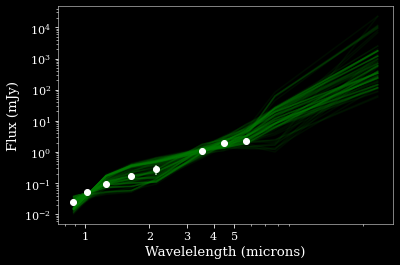

In [79]:
pl.errorbar(np.array(wavelengths)[:10]/1e4, source.flux, yerr=source.error, linestyle='none', color='w', marker='o')
_=pl.plot(np.array(wavelengths)[:10]/1e4, 10**fitinfo.model_fluxes[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 75,:].T, alpha=0.1, color='g')
_=pl.loglog()
_=pl.gca().set_xticks([1,2,3,4,5])
_=pl.gca().set_xticklabels([1,2,3,4,5])
_=pl.xlabel("Wavelelength (microns)")
_=pl.ylabel("Flux (mJy)")

In [80]:
fitinfo.model_id, fitinfo.model_fluxes, fitinfo.sc, fitinfo.chi2, fitinfo.filter_table, fitinfo.source, fitinfo.chi2.min()

(array([ 3257,  3256,  3249, ..., 37728, 37715, 89999]),
 <Quantity [[-1.30501061, -1.61424079, -0.97690536, ...,  0.4151949 ,
              0.92315078,  2.45542693],
            [-1.30665023, -1.63496442, -0.95251953, ...,  0.40160656,
              0.91871542,  2.4307282 ],
            [-1.31073423, -1.63079734, -0.95185335, ...,  0.38085887,
              0.90394014,  2.4039464 ],
            ...,
            [        nan,         nan,         nan, ...,         nan,
                     nan,         nan],
            [        nan,         nan,         nan, ...,         nan,
                     nan,         nan],
            [        nan,         nan,         nan, ...,         nan,
                     nan,         nan]]>,
 array([0.29013258, 0.30756261, 0.32499265, ..., 0.25527251, 0.25527251,
        0.25527251]),
 <Quantity [2.8595029 , 4.15012258, 4.67008156, ...,        nan,        nan,
                   nan]>,
 <bound method FitInfo.filter_table of <sedfitter.fit_info.FitInfo

In [89]:
#pars = Table.read('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s-pbhmi/parameters.fits')
pars = Table.read('/blue/adamginsburg/richardson.t/research/flux/pars/s-ubhmi_augmented.fits')

# What properties reasonably match?

Have we measured any parameters - star radius, temperature, or mass - well?

In [90]:
selection = fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 25
pars[fitinfo.model_id[selection]].show_in_notebook()

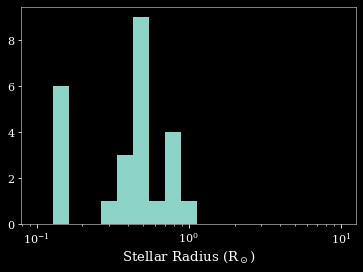

In [91]:
pl.hist(pars[fitinfo.model_id[selection]]['star.radius'], bins=np.logspace(-1,1,20))
pl.xlabel("Stellar Radius (R$_\odot$)")
_=pl.semilogx()

Text(0.5, 0, 'Stellar Temperature (K)')

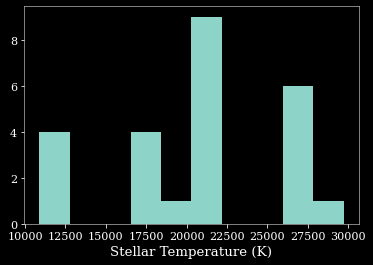

In [92]:
pl.hist(pars[fitinfo.model_id[selection]]['star.temperature'])
pl.xlabel("Stellar Temperature (K)")

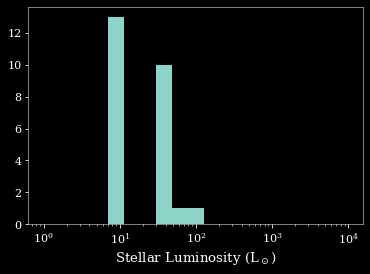

In [93]:
pl.hist(pars[fitinfo.model_id[selection]]['Model Luminosity'], bins=np.logspace(0,4,20))
pl.xlabel("Stellar Luminosity (L$_\odot$)")
_=pl.semilogx()

Text(0.5, 0, 'Envelope Mass (M$_\\odot$)')

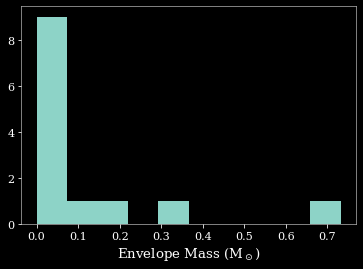

In [99]:
pl.hist(pars[fitinfo.model_id[selection]]['Sphere Masses'][5])
pl.xlabel("Envelope Mass (M$_\odot$)")

# Next Step: ALMA photometry


Aperture photometry in ALMA data to get 1mm, 3mm constraints

In [100]:
from astropy.visualization import simple_norm

In [101]:
pfxs['finaliter_prefix_b6']

'G351.77/B6/cleanest/G351.77_B6_uid___A001_X1296_X201_continuum_merged_12M_robust0_selfcal4_finaliter'

<Quantity 0.00048579 Jy / beam>

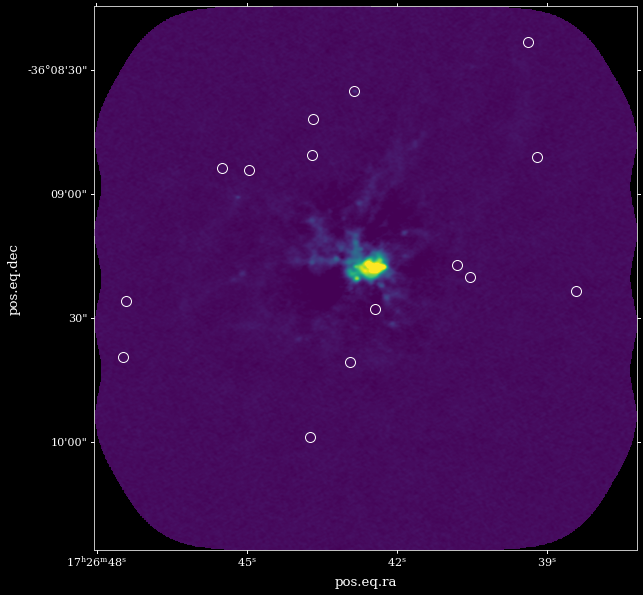

In [102]:
fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]

cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b6']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ww)
ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99.95, min_percent=1, stretch='asinh'))

matches = ww.footprint_contains(coords)

cc = coords[matches]

ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

alma_1mm_rms = cube.mad_std()
alma_1mm_rms

# Compute ALMA photometry

In [103]:
import photutils

In [104]:
crds = SkyCoord(sed_tbl['ra'], sed_tbl['dec'])
sky_apertures = photutils.aperture.SkyCircularAperture(crds, 2*u.arcsec)
apertures = sky_apertures.to_pixel(ww)

sky_annulus_aperture = photutils.aperture.SkyCircularAnnulus(crds, r_in=3*u.arcsec, r_out=5*u.arcsec)
annulus_apertures = sky_annulus_aperture.to_pixel(ww)

In [105]:
from astropy.stats import sigma_clipped_stats

In [106]:
annulus_masks = annulus_apertures.to_mask(method='center')
data = cube[0]

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    if annulus_data is None:
        bkg_median.append(np.nan * data.unit)
        continue
    annulus_data_1d = annulus_data[mask.data != 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)
bkg_median = u.Quantity(bkg_median)
phot = photutils.aperture_photometry(data, apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * apertures.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
phot['flux'] = phot['aper_sum_bkgsub'] / cube.pixels_per_beam * u.beam
phot['significant'] = phot['flux'] > 3 * alma_1mm_rms*u.beam

In [107]:
sed_tbl['ALMA-IMF_1mm_flux'] = np.where(phot['significant'], phot['flux'], np.nan)
sed_tbl['ALMA-IMF_1mm_eflux'] = alma_1mm_rms

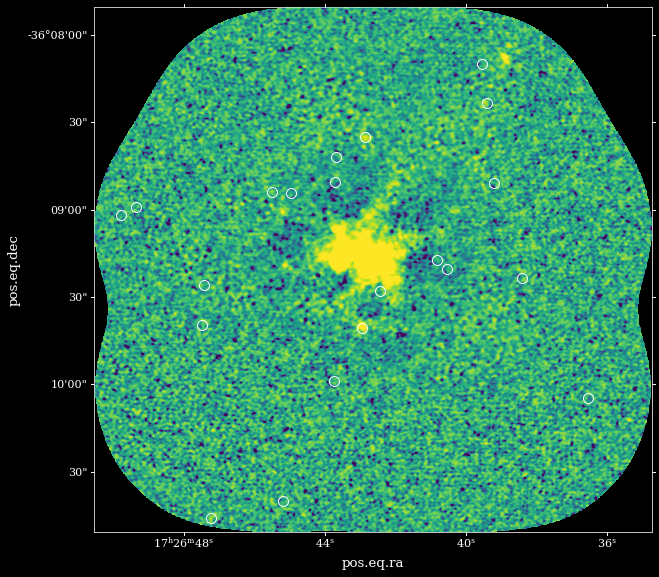

In [108]:
fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]

cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ww)
ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))

matches = ww.footprint_contains(coords)

cc = coords[matches]

ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

In [109]:
cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
alma_3mm_rms = cube.mad_std()

ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

crds = SkyCoord(sed_tbl['ra'], sed_tbl['dec'])
sky_apertures = photutils.aperture.SkyCircularAperture(crds, 2*u.arcsec)
apertures = sky_apertures.to_pixel(ww)

sky_annulus_aperture = photutils.aperture.SkyCircularAnnulus(crds, r_in=3*u.arcsec, r_out=5*u.arcsec)
annulus_apertures = sky_annulus_aperture.to_pixel(ww)

annulus_masks = annulus_apertures.to_mask(method='center')
data = cube[0]

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    if annulus_data is None:
        bkg_median.append(np.nan * data.unit)
        continue
    annulus_data_1d = annulus_data[mask.data != 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)
bkg_median = u.Quantity(bkg_median)
phot = photutils.aperture_photometry(data, apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * apertures.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
phot['flux'] = phot['aper_sum_bkgsub'] / cube.pixels_per_beam * u.beam
phot['significant'] = phot['flux'] > 3 * alma_3mm_rms*u.beam

sed_tbl['ALMA-IMF_3mm_flux'] = np.where(phot['significant'], phot['flux'], np.nan)
sed_tbl['ALMA-IMF_3mm_eflux'] = alma_3mm_rms

In [110]:
# convert magnitudes to fluxes now
# (it's a pain to try to deal with a mix of magnitudes & fluxes)
for colname, errcolname, zpn in zip(magcols, emagcols, filternames):
    print(colname, zpn)
    zp = u.Quantity(zpts[zpn], u.Jy)
    data = sed_tbl[colname].value
    if hasattr(sed_tbl[colname], 'mask'):
        sed_tbl[zpn+"_flux"] = flx = np.ma.masked_where(sed_tbl[colname].mask, (zp * 10**(data/-2.5)).to(u.mJy))
    else:
        sed_tbl[zpn+"_flux"] = flx = (zp * 10**(data/-2.5)).to(u.mJy)
    err = sed_tbl[errcolname] / 1.09 * flx
    sed_tbl[zpn+"_eflux"] = err

Ymag Paranal/VISTA.Y
Zmag Paranal/VISTA.Z
Jmag Paranal/VISTA.J
Hmag Paranal/VISTA.H
Ksmag Paranal/VISTA.Ks
mag3_6 Spitzer/IRAC.I1
mag4_5 Spitzer/IRAC.I2
mag5_8 Spitzer/IRAC.I3
mag8_0 Spitzer/IRAC.I4
S24 Spitzer/MIPS.24mu


In [111]:
sed_tbl

<Table length=15>
SPICY     ra        dec         l          b        p1      p2      p3   ... Spitzer/IRAC.I2_eflux Spitzer/IRAC.I3_flux Spitzer/IRAC.I3_eflux Spitzer/IRAC.I4_flux Spitzer/IRAC.I4_eflux Spitzer/MIPS.24mu_flux Spitzer/MIPS.24mu_eflux
         deg        deg        deg        deg                            ...        mJy mag                                      mag                                        mag                   mJy                     mJy          
int64  float64    float64    float64    float64  float32 float32 float32 ...        float64              float64               float64              float64               float64               float64                 float64        
----- ---------- ---------- ---------- --------- ------- ------- ------- ... --------------------- -------------------- --------------------- -------------------- --------------------- ---------------------- -----------------------
54167 261.652251 -36.167927 351.752496 -0.526919      --      --    0.91 ...    0.2740962862365682    5.044411981234886    0.5275806856601362                   --                    --                    nan                     nan
54233 261.688301  -36.17784 351.760508   -0.5566    0.86      --    0.71 ...    0.2548659411014184    5.350693088896638   0.28962466037319395    5.230821208522155   0.20635350493995058                    nan                     nan
54251 261.696805  -36.17938 351.763059 -0.563156    0.69      --    0.13 ...    0.1461149844668647   1.9266833071321223    0.2368583140052294    2.397562349604359   0.18256665623500384                    nan                     nan
54224 261.682255 -36.166349 351.767322 -0.546139      --      --    0.76 ...   0.19228910709728939   2.3036173412876484   0.42902230109948514                   --                    --                    nan                     nan
54197 261.668901  -36.15563 351.770203 -0.531211    0.82      --    0.77 ...    0.8403241332716208   16.129101594269383    0.6658803575851358   13.175578282274833    0.5922965909157236                    nan                     nan
54188 261.663333 -36.147512 351.774431  -0.52295      --      --    0.88 ...    0.1934932636251193    3.338953614328159   0.26650360889761565    2.941506723887444    0.3049451722896188                    nan                     nan
54255 261.697831 -36.160975 351.778798 -0.553578      --      --    0.92 ...   0.18242947552712288                   --                    --                   --                    --                    nan                     nan
54189 261.664128 -36.139826 351.781167 -0.519194    0.55      --    0.83 ...   0.12763238232257174    1.850164359707208   0.20538521566135595   2.7401195942528087   0.15083226478149292                    nan                     nan
54212 261.678557 -36.143122 351.784934 -0.530703    0.54      --    0.74 ...     3.599015896589188   115.88051260054267     2.551497545347835   134.82484032176887     2.721235142440542                    nan                     nan
54265 261.705651 -36.149799 351.791596 -0.552586      --      --    0.81 ...    0.5037685480342684    14.79143648105881    0.6513660153314378    7.491512969938875    0.3848850591080213                    nan                     nan
54213  261.67888 -36.161311 351.769984 -0.541067      --      --    0.73 ...     3.520744189508174   56.131951191725705    17.509048872805266                   --                    --                    nan                     nan
54207 261.676801 -36.157759 351.771995 -0.537692      --      --    0.57 ...    0.4529933544452166                   --                    --                   --                    --                    nan                     nan
54222 261.682114 -36.147398 351.782987 -0.535472    0.95      --    0.63 ...   0.24045243669419578    3.959225994210159   0.22883600056384568   3.4943741459207156    0.1923508621771815                    nan                     nan
54235 261.689581 -36.148292 351.785609

We can also try to use the fluxes measured with getsf.

Those catalogs are in:

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/catalog

Though as we'll see below, there is not a one-to-one match!

In [112]:
from astropy.io import ascii
getsf_cat = ascii.read(f'/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/catalog/{fieldid}-getsf.cat',
                       data_start=0, format='commented_header', header_start=120, comment="!")
getsf_cat

<Table length=34>
  NO    S1    S2    SX   XCO_P   YCO_P   WCS_ACOOR   WCS_DCOOR    FG    SIGN    GOOD   FM01 SIGNM01 GOODM01 ... FXP_BST03  FXP_ERR03 FXT_BST03  FXT_ERR03 FXT_ALT03  SCALE03 AFWHM03 BFWHM03 ASIZE03 BSIZE03 THETA03  FOFA03  FOOA03  FOOB03
int64 int64 int64 int64 float64 float64   float64     float64   int64 float64 float64 int64 float64 float64 ...  float64    float64   float64    float64   float64   float64 float64 float64 float64 float64 float64 float64 float64 float64
----- ----- ----- ----- ------- ------- ----------- ----------- ----- ------- ------- ----- ------- ------- ... ---------- --------- ---------- --------- ---------- ------- ------- ------- ------- ------- ------- ------- ------- -------
    1     2    80    23   436.2   409.6 261.6761432 -36.1549265     0   548.9   490.2     0   398.5   298.9 ...    0.06681  0.004376    0.08786   0.00341    0.09304   1.406   1.855   1.626   1.574   1.414   80.89  -2.311   3.325   3.249
    2     2    80    23   423.0   411.0 261.6771877 -36.1548371     1   521.7   456.2     0   393.8   338.1 ...    0.04656  0.003544      0.106  0.003643     0.1073   1.406   2.665   1.862   2.286    1.64   85.99    -3.0   4.457   4.218
    3     2    80    30   426.1   405.6 261.6769404 -36.1551805     1   257.1   300.3     0   196.4   227.2 ...    0.04184  0.005207    0.09605  0.004647    0.09816   1.406   2.564     2.2   1.993    1.73   99.66  -2.655   3.796   3.733
    4    18    80    23   370.5   417.5 261.6813418 -36.1544217     0   51.63   175.8     0    5.17   1.708 ...    0.02407 0.0009603    0.05891 0.0009474    0.06235   1.406   2.614   2.266   2.047   1.789   40.78   -2.93   4.201    4.12
    5     8    80    28   361.7   415.0  261.682037 -36.1545814     0   82.23   146.5     0   16.55    7.91 ...    0.03116  0.001775    0.05259  0.001593    0.05403   1.406     2.2   1.683   1.933   1.531   173.6  -2.655   3.836   3.733
    6     2    80    21   408.5   397.5  261.678335 -36.1556996     0   188.4   75.14     0   141.3   56.82 ...     0.0122  0.004396    0.01028   0.00339    0.01129   1.406   1.478   1.337   1.121   1.028   164.9  -2.311   3.256   3.249
    7     2    80    23   416.2   405.2 261.6777258 -36.1552076     0   145.3   46.98     0   111.3   35.84 ...    0.01637  0.001587    0.04794  0.001592    0.04808   1.406   2.791   2.521   2.197   1.984   30.01    -3.0   4.241   4.218
    8     5    80    16   406.3   594.3 261.6785063 -36.1431241     0   23.43    31.4     1    17.7   23.67 ...  0.0008698 0.0002689   0.001187 0.0002695   0.001642   1.406   2.256   1.742    0.23    0.23   71.44    -3.0   4.238   4.218
    9     5    80    16   283.5   482.5 261.6882252 -36.1502685     0   22.23    29.5     0   17.09   22.69 ...   0.001155 0.0002523   0.001672 0.0002531   0.001658   1.406    1.92   1.504   1.946   1.586   61.56    -3.0   4.245   4.218
   10     7    80    23   434.5   390.0 261.6762777 -36.1561787     0   102.4   21.35     0   16.78    4.49 ... -0.0006986 0.0005833   -0.01414 0.0005851  -0.002336   1.406    5.39   2.056   3.402   1.252   10.44    -3.0   4.259   4.218
   11    11    80    26   288.1   402.9   261.68786 -36.1553557     1   16.56   20.75     0   12.48   16.13 ...   0.001343 0.0002241   0.002776 0.0002255   0.003223   1.406    2.83   1.895   2.356   1.473   48.08    -3.0    4.28   4.218
   12     3    80    23   402.9   402.7 261.6787815 -36.1553664     0   61.84   19.88     0   47.18    15.2 ...   0.004614  0.002655   0.006207  0.002047    0.00624   1.406   1.877   1.555   1.643   1.356   53.85  -2.311   3.255   3.249
   13     9    80    23   446.0   349.5 261.6753677 -36.1587662     0   17.89   18.56     0   13.59    14.1 ...  0.0006007 0.0002435  0.0006119 0.0002443   0.001241   1.406   2.627   1.693    0.23    0.23   39.32    -3.0   4.247   4.218
   14     5    80    21   387.0   418.0 261.6800362 -36.1543898     0    26.9   16.26     0   20.56   12.44 ...    0.00229 0.0009024  0.0005623 0.0009046    0.01388   1.406   22.74    16.4  

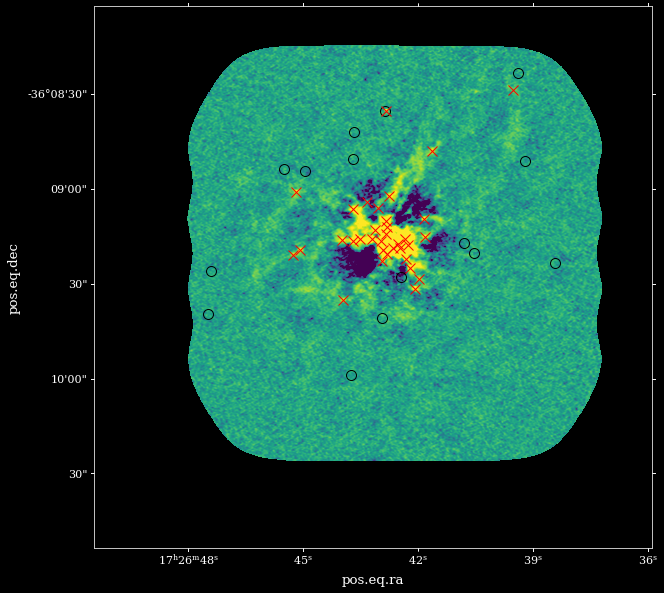

In [113]:
pfxs = prefixes[fieldid]

cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b6']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ww)
ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))

ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'ko', mfc='none', mec='k', markersize=10, transform=ax.get_transform('fk5'), )

ax.plot(getsf_cat['WCS_ACOOR'], getsf_cat['WCS_DCOOR'],
        'rx', mfc='none', mec='r', markersize=10, transform=ax.get_transform('fk5'), )

In [114]:
# hacky function to extract the rows of an SED table as a plottable entry
def getrow(tb, rownum, keys):
    return np.array([tb[rownum][key] for key in keys])

In [115]:
sed_tbl[8]

<Row index=8>
SPICY     ra        dec         l          b        p1      p2      p3     class   silicate  pah        alpha             alpha_8       alpha_24 alpha_w4   env     group     var    nr     r     sigmar skewnessr          Spitzer            mag3_6 e_mag3_6  mag4_5 e_mag4_5  mag5_8 e_mag5_8  mag8_0 e_mag8_0  csf   m3_6  m4_5  m5_8  m8_0       2MASS               UKIDSS         VIRAC   GaiaDR2        MIPS              AllWISE        ZTFDR3  RA_ICRS    DE_ICRS    Ksmag   KsEll      pm          e_pm         pmRA        e_pmRA        pmDE        e_pmDE      Nep  flgrel   Zmag    Zell    Ymag    Yell    Jmag    Jell    Hmag    Hell  Zdetflg Ydetflg Jdetflg Hdetflg   S24    e_S24   ALMA-IMF_1mm_flux     ALMA-IMF_1mm_eflux    ALMA-IMF_3mm_flux     ALMA-IMF_3mm_eflux   Paranal/VISTA.Y_flux Paranal/VISTA.Y_eflux Paranal/VISTA.Z_flux Paranal/VISTA.Z_eflux Paranal/VISTA.J_flux Paranal/VISTA.J_eflux Paranal/VISTA.H_flux Paranal/VISTA.H_eflux Paranal/VISTA.Ks_flux Paranal/VISTA.Ks_eflux Spitzer/IRAC.I1_flux Spitzer/IRAC.I1_eflux Spitzer/IRAC.I2_flux Spitzer/IRAC.I2_eflux Spitzer/IRAC.I3_flux Spitzer/IRAC.I3_eflux Spitzer/IRAC.I4_flux Spitzer/IRAC.I4_eflux Spitzer/MIPS.24mu_flux Spitzer/MIPS.24mu_eflux
         deg        deg        deg        deg                                                                                                                                                                                                   mag     mag      mag     mag      mag     mag      mag     mag                                                                                                                                             deg        deg       mag            mas / yr     mas / yr     mas / yr     mas / yr     mas / yr     mas / yr                   mag             mag             mag             mag                                                                                      Jy / beam                                   Jy / beam                                                                                                                                                                                                                                         mJy                 mJy mag                mJy                 mJy mag                                      mag                                        mag                   mJy                     mJy          
int64  float64    float64    float64    float64  float32 float32 float32   bytes9    bool    bool      float64            float64       float64  float64   bytes7  bytes10   int16 int16 float64 float64  float64           bytes26           float32 float32  float32 float32  float32 float32  float32 float32  int32 int32 int32 int32 int32      bytes18             bytes19         int32    int64       bytes18             bytes20        int64   float64    float64   float32 float32  float64      float64      float64      float64      float64      float64     int16 uint8  float64 float32 float64 float32 float32 float32 float64 float32  uint8   uint8   uint8   uint8  float64 float64       float64               float64               float64               float64               float64               float64              float64               float64              float64               float64              float64               float64               float64               float64               float64               float64              float64               float64              float64               float64              float64               float64               float64                 float64        
----- ---------- ---------- ---------- --------- ------- ------- ------- --------- -------- ----- ------------------ ------------------ -------- -------- ------- ---------- ----- ----- ------- ------- --------- -------------------------- ------- -------- ------- -------- ------- -------- ------- -------- ----- ----- ----- ----- ----- ------------------ ----------------

# $$ A_V$$

In [116]:
source.flux, source.valid, source.error

(array([0.05241254, 0.02584341, 0.09473161, 0.16948568, 0.28167786,
        1.11119439, 1.95883347, 2.30361687,        nan,        nan]),
 array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        False]),
 array([0.00841005, 0.00400217, 0.01227165, 0.04419067, 0.10336803,
        0.08869166, 0.19228916, 0.42902221,        nan,        nan]))

In [117]:
source.valid[2] = 3
source.valid

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False])

In [118]:
sed_tbl

<Table length=15>
SPICY     ra        dec         l          b        p1      p2      p3   ... Spitzer/IRAC.I2_eflux Spitzer/IRAC.I3_flux Spitzer/IRAC.I3_eflux Spitzer/IRAC.I4_flux Spitzer/IRAC.I4_eflux Spitzer/MIPS.24mu_flux Spitzer/MIPS.24mu_eflux
         deg        deg        deg        deg                            ...        mJy mag                                      mag                                        mag                   mJy                     mJy          
int64  float64    float64    float64    float64  float32 float32 float32 ...        float64              float64               float64              float64               float64               float64                 float64        
----- ---------- ---------- ---------- --------- ------- ------- ------- ... --------------------- -------------------- --------------------- -------------------- --------------------- ---------------------- -----------------------
54167 261.652251 -36.167927 351.752496 -0.526919      --      --    0.91 ...    0.2740962862365682    5.044411981234886    0.5275806856601362                   --                    --                    nan                     nan
54233 261.688301  -36.17784 351.760508   -0.5566    0.86      --    0.71 ...    0.2548659411014184    5.350693088896638   0.28962466037319395    5.230821208522155   0.20635350493995058                    nan                     nan
54251 261.696805  -36.17938 351.763059 -0.563156    0.69      --    0.13 ...    0.1461149844668647   1.9266833071321223    0.2368583140052294    2.397562349604359   0.18256665623500384                    nan                     nan
54224 261.682255 -36.166349 351.767322 -0.546139      --      --    0.76 ...   0.19228910709728939   2.3036173412876484   0.42902230109948514                   --                    --                    nan                     nan
54197 261.668901  -36.15563 351.770203 -0.531211    0.82      --    0.77 ...    0.8403241332716208   16.129101594269383    0.6658803575851358   13.175578282274833    0.5922965909157236                    nan                     nan
54188 261.663333 -36.147512 351.774431  -0.52295      --      --    0.88 ...    0.1934932636251193    3.338953614328159   0.26650360889761565    2.941506723887444    0.3049451722896188                    nan                     nan
54255 261.697831 -36.160975 351.778798 -0.553578      --      --    0.92 ...   0.18242947552712288                   --                    --                   --                    --                    nan                     nan
54189 261.664128 -36.139826 351.781167 -0.519194    0.55      --    0.83 ...   0.12763238232257174    1.850164359707208   0.20538521566135595   2.7401195942528087   0.15083226478149292                    nan                     nan
54212 261.678557 -36.143122 351.784934 -0.530703    0.54      --    0.74 ...     3.599015896589188   115.88051260054267     2.551497545347835   134.82484032176887     2.721235142440542                    nan                     nan
54265 261.705651 -36.149799 351.791596 -0.552586      --      --    0.81 ...    0.5037685480342684    14.79143648105881    0.6513660153314378    7.491512969938875    0.3848850591080213                    nan                     nan
54213  261.67888 -36.161311 351.769984 -0.541067      --      --    0.73 ...     3.520744189508174   56.131951191725705    17.509048872805266                   --                    --                    nan                     nan
54207 261.676801 -36.157759 351.771995 -0.537692      --      --    0.57 ...    0.4529933544452166                   --                    --                   --                    --                    nan                     nan
54222 261.682114 -36.147398 351.782987 -0.535472    0.95      --    0.63 ...   0.24045243669419578    3.959225994210159   0.22883600056384568   3.4943741459207156    0.1923508621771815                    nan                     nan
54235 261.689581 -36.148292 351.785609

In [126]:
sed_tbl['Herschel/SPIRE.PLW_flux'] = np.nan
sed_tbl['Herschel/SPIRE.PLW_eflux'] = 3*u.mJy
sed_tbl['Herschel/SPIRE.PMW_flux'] = np.nan
sed_tbl['Herschel/SPIRE.PMW_eflux'] = 3*u.mJy
sed_tbl['Herschel/SPIRE.PSW_flux'] = np.nan
sed_tbl['Herschel/SPIRE.PSW_eflux'] = 3*u.mJy
sed_tbl['Herschel/Pacs.blue_flux'] = np.nan
sed_tbl['Herschel/Pacs.blue_eflux'] = 3*u.mJy
sed_tbl['Herschel/Pacs.red_flux'] = np.nan
sed_tbl['Herschel/Pacs.red_eflux'] = 10*u.mJy

In [129]:
filternames

['Paranal/VISTA.Y',
 'Paranal/VISTA.Z',
 'Paranal/VISTA.J',
 'Paranal/VISTA.H',
 'Paranal/VISTA.Ks',
 'Spitzer/IRAC.I1',
 'Spitzer/IRAC.I2',
 'Spitzer/IRAC.I3',
 'Spitzer/IRAC.I4',
 'Spitzer/MIPS.24mu',
 'Herschel/Pacs.blue',
 'Herschel/Pacs.red',
 'Herschel/SPIRE.PSW',
 'Herschel/SPIRE.PMW',
 'Herschel/SPIRE.PLW']

In [130]:
Herschel_bands = np.array([('Herschel' in filtername) for filtername in filternames])
Herschel_bands

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [135]:
filters

['Paranal/VISTA.Y',
 'Paranal/VISTA.Z',
 'Paranal/VISTA.J',
 'Paranal/VISTA.H',
 'Paranal/VISTA.Ks',
 'Spitzer/IRAC.I1',
 'Spitzer/IRAC.I2',
 'Spitzer/IRAC.I3',
 'Spitzer/IRAC.I4',
 'Spitzer/MIPS.24mu',
 'Herschel/Pacs.blue',
 'Herschel/Pacs.red',
 'Herschel/SPIRE.PSW',
 'Herschel/SPIRE.PMW',
 'Herschel/SPIRE.PLW',
 'ALMA-IMF_1mm',
 'ALMA-IMF_3mm']

In [137]:
from astropy import units as u
from sedfitter.extinction import Extinction
from sedfitter.source import Source

# Define path to models
model_dir = f'{robitaille_modeldir}/spubhmi'


# make an extinction law
from dust_extinction.parameter_averages import F19

# https://arxiv.org/abs/0903.2057
# 1.34 is from memory
guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
ext_vals = ext.evaluate(ext_wav, Rv=3.1)
extinction = Extinction()
extinction.wav = ext_wav
extinction.chi = ext_vals / guyver2009_avtocol

# Define filters and apertures
#filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
#apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
filters = filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"]
apertures = ([3]*(len(filters)))*u.arcsec


source = Source()
# wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),
rownum = 9


flx = getrow(sed_tbl, rownum, keys=[key+"_flux" for key in filters])
error = getrow(sed_tbl, rownum, keys=[key+"_eflux" for key in filters])
valid = np.zeros(flx.size, dtype='int') # [0,0,0,0,0,0,0]
valid[(np.isfinite(flx) & np.isfinite(error))] = 1
valid[(~np.isfinite(flx) & ~np.isfinite(error))] = 0
valid[(~np.isfinite(flx) & np.isfinite(error))] = 3

# set the "flux" to be the 3-sigma error wherever we're treating it as an upper limit
flx[valid == 3] = error[valid == 3] * 3
# then, set the confidence associated with that upper limit
error[valid == 3] = 0.997 # 0.997 is (approximately) 3-sigma

Herschel_bands = np.array([('Herschel' in filtername) for filtername in filters])
valid[Herschel_bands] = 3 
error[Herschel_bands] = 1.0 # if the flux of the model is greater than our Herschel flux, it will have a 
# likelihood of negative infinite (chi^2 -> infinite)


print(f"valid={valid}")

source.valid = valid#[valid]
source.flux = flx    
source.error =  error

fitter = Fitter(filter_names=np.array(['user_filters/'+x if 'ALMA' in x else x for x in filters]),#[valid],
                apertures=apertures,#[valid],
                model_dir=model_dir,
                extinction_law=extinction,
                distance_range=[1.8,2.2]*u.kpc,
                av_range=[4,40],
               )


# Run the fitting
spubhmi_fitinfo = fitter.fit(source)

valid=[0 0 0 0 1 1 1 1 1 0 3 3 3 3 3 3 3]
 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  spubhmi
   Log[d] stepping     :  0.02
   Number of distances :  6

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(720000, 6, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//spubhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//spubhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//spubhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//spubhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richards

In [138]:
ls /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/*/

ls: cannot access /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/*/: No such file or directory


In [139]:
valid

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3])

In [140]:
(fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600).sum(), source.flux, source,error, source.valid

(7854,
 array([           nan,            nan,            nan,            nan,
        6.03882907e-01, 9.00720303e+00, 1.37276935e+01, 1.47914365e+01,
        7.49151297e+00,            nan, 9.00000000e+00, 3.00000000e+01,
        9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 1.45737987e-03,
        7.55825708e-04]),
 array([       nan,        nan,        nan,        nan, 0.0554021 ,
        0.37185702, 0.50376855, 0.65136602, 0.38488506,        nan,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.997     , 0.997     ]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3]))

In [141]:
wavelengths

[10214.640781005335,
 8797.922910002639,
 12535.160163842003,
 16454.60206191742,
 21540.380960093342,
 35313.63598684463,
 44690.969050155916,
 56820.095263896386,
 77546.04772338903,
 235124.41589432122,
 703896.3790629619,
 1602029.811409444,
 2472100.952645733,
 3469665.646950985,
 4967235.401178444]

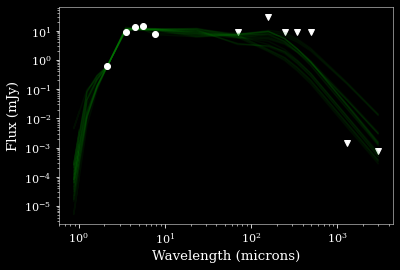

In [142]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

_=pl.plot(wavelengths.value,
          (10**spubhmi_fitinfo.model_fluxes[spubhmi_fitinfo.chi2 < np.nanmin(spubhmi_fitinfo.chi2) + 50, :].T),
          alpha=0.1, color='g')
_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")

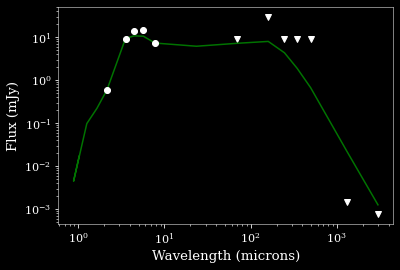

In [143]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

_=pl.plot(wavelengths.value,
          (10**spubhmi_fitinfo.model_fluxes[np.nanargmin(spubhmi_fitinfo.chi2), :].T),
          alpha=0.9, color='g')
_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")

In [147]:
def get_geometry_fits(rownumber, geometry='s-p-smi'):
    
    # Define path to models
    model_dir = f'{robitaille_modeldir}/{geometry}'


    # make an extinction law
    from dust_extinction.parameter_averages import F19

    # https://arxiv.org/abs/0903.2057
    # 1.34 is from memory
    guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
    ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
    ext_vals = ext.evaluate(ext_wav, Rv=3.1)
    extinction = Extinction()
    extinction.wav = ext_wav
    extinction.chi = ext_vals / guyver2009_avtocol

    # Define filters and apertures
    #filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
    #apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
    filters = filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"]
    apertures = ([3]*(len(filters)))*u.arcsec


    source = Source()
    # wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),


    flx = getrow(sed_tbl, rownum, keys=[key+"_flux" for key in filters])
    error = getrow(sed_tbl, rownum, keys=[key+"_eflux" for key in filters])
    valid = np.zeros(flx.size, dtype='int') # [0,0,0,0,0,0,0]
    valid[(np.isfinite(flx) & np.isfinite(error))] = 1
    valid[(~np.isfinite(flx) & ~np.isfinite(error))] = 0
    valid[(~np.isfinite(flx) & np.isfinite(error))] = 3
    # set the "flux" to be the 3-sigma error wherever we're treating it as an upper limit
    flx[valid == 3] = error[valid == 3] * 3
    # then, set the confidence associated with that upper limit
    error[valid == 3] = 0.997 # 0.997 is (approximately) 3-sigma
    print(f"valid={valid}")

    source.valid = valid#[valid]
    source.flux = flx    
    source.error =  error

    fitter = Fitter(filter_names=np.array(['user_filters/'+x if 'ALMA' in x else x for x in filters]),#[valid],
                    apertures=apertures,#[valid],
                    model_dir=model_dir,
                    extinction_law=extinction,
                    distance_range=[1.8,2.2]*u.kpc,
                    av_range=[4,40],
                   )


    # Run the fitting
    fitinfo = fitter.fit(source)

    return fitinfo

In [148]:
geometries = ["s---s-i","s---smi","sp--s-i", "sp--h-i","s---smi",
"s-p-smi",
"s-p-hmi",
"s-pbsmi",
"s-pbhmi",
"s-u-smi",
"s-u-hmi",
"s-ubsmi",
"spu-smi",
"spu-hmi",
"spubsmi",
"spubhmi",]
              

In [149]:
bestfits_row9 = {geom: get_geometry_fits(9, geometry=geom) for geom in geometries}

valid=[0 0 0 0 1 1 1 1 1 0 3 3 3 3 3 3 3]
 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s---s-i
   Log[d] stepping     :  0.02
   Number of distances :  6

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(10000, 6, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s---s-i/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s---s-i/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s---s-i/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2//s---s-i/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardso

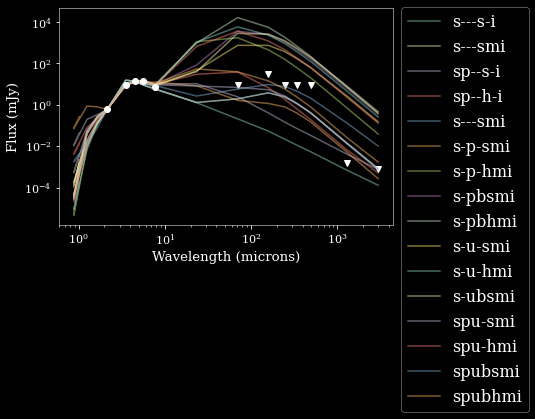

In [150]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

for geom in geometries:
    fitinfo = bestfits_row9[geom]
    _=pl.plot(wavelengths.value,
              (10**fitinfo.model_fluxes[np.nanargmin(fitinfo.chi2), :].T),
              alpha=0.5, label=geom)

_=pl.loglog()
pl.legend(bbox_to_anchor=(1.0,1.04))
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")

In [151]:
{geom: np.nanmin(fitinfo.chi2) for geom, fitinfo in bestfits_row9.items()}

{'s---s-i': <Quantity 330.63573062>,
 's---smi': <Quantity 348.1160501>,
 'sp--s-i': <Quantity 70.00946884>,
 'sp--h-i': <Quantity 51.00658296>,
 's-p-smi': <Quantity 176.28136217>,
 's-p-hmi': <Quantity 154.93504889>,
 's-pbsmi': <Quantity 115.81742827>,
 's-pbhmi': <Quantity 113.05180988>,
 's-u-smi': <Quantity 154.12737896>,
 's-u-hmi': <Quantity 98.30678618>,
 's-ubsmi': <Quantity 106.01315047>,
 'spu-smi': <Quantity 116.63981627>,
 'spu-hmi': <Quantity 110.18695032>,
 'spubsmi': <Quantity 80.29762649>,
 'spubhmi': <Quantity 89.60097114>}

In [152]:
from sedfitter.sed import SEDCube

In [153]:
sedcube = SEDCube.read(f"{model_dir}/flux.fits",)

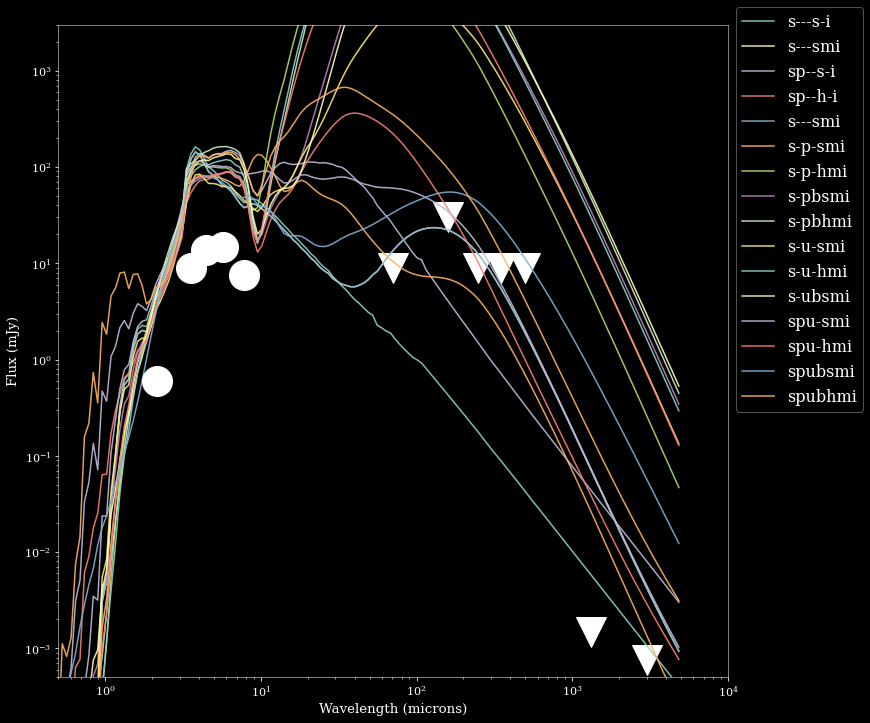

In [154]:
pl.figure(figsize=(12,12))

wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o', markersize=30)
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v', markersize=30)

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

for geom in geometries:
    fitinfo = bestfits_row9[geom]
    
    model_dir = f'{robitaille_modeldir}/{geom}'
    sedcube = SEDCube.read(f"{model_dir}/flux.fits",)
    
    index = np.nanargmin(fitinfo.chi2)
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)    
    _=pl.plot(sedcube.wav,
              sed.flux[apnum] * 10**fitinfo.sc[index] * 10**(fitinfo.av[index] * extinction.get_av(sed.wav)),
              label=geom, alpha=0.9)
              #sedcube.val[np.nanargmin(fitinfo.chi2), apnum, :].T * (1*u.kpc/distance)**2,
              #alpha=0.5, label=geom)

pl.legend(bbox_to_anchor=(1.0,1.04))
pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,3e3)
_=pl.xlim(0.5, 1e4)

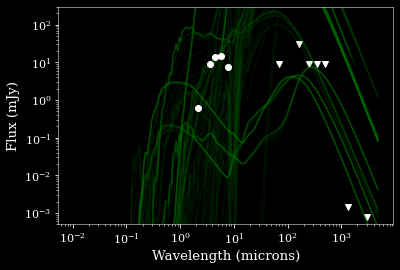

In [155]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

_=pl.plot(sedcube.wav,
          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 50, apnum, :].T * (1*u.kpc/distance)**2,
          alpha=0.1, color='g')

_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,3e2)

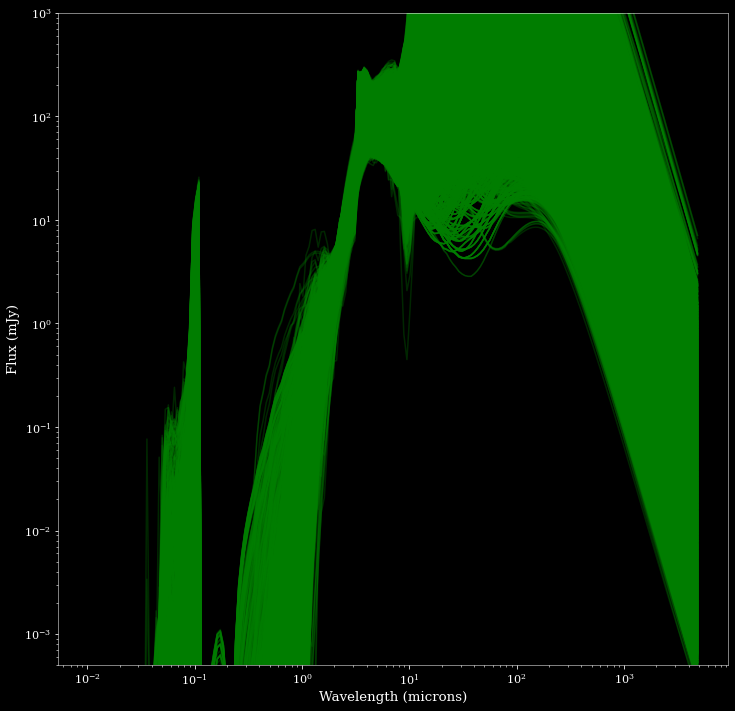

In [156]:
pl.figure(figsize=(12,12))


wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid], source.flux[valid], yerr=source.error[valid], linestyle='none', color='w', marker='o')

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

#_=pl.plot(sedcube.wav,
#          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, apnum, :].T * (1*u.kpc/distance)**2,
#          alpha=0.1, color='g')


for index in np.where(fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600)[0]:
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)
    pl.plot(sed.wav,
            sed.flux[apnum] * 10**fitinfo.sc[index] * 10**(fitinfo.av[index] * extinction.get_av(sed.wav)), 'g', alpha=0.3)


_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,1e3)

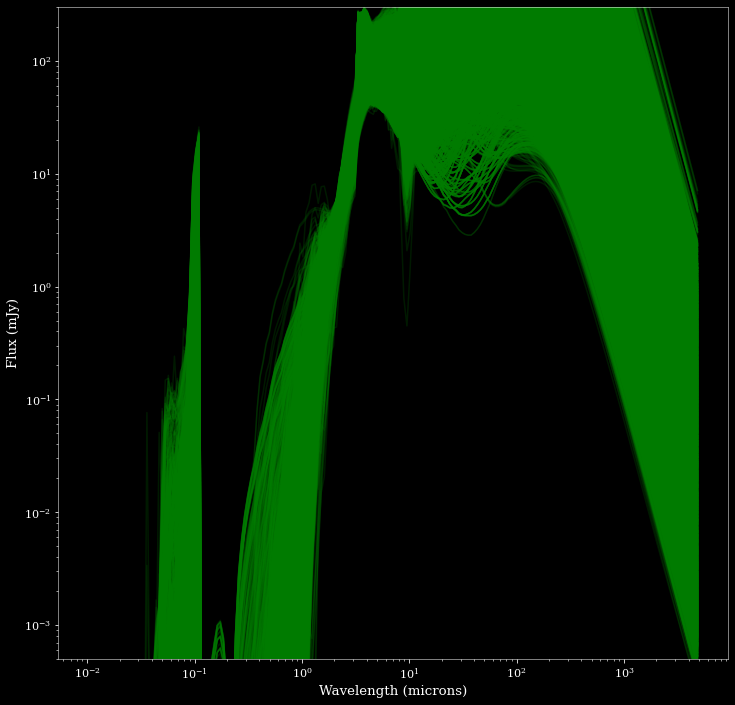

In [157]:
pl.figure(figsize=(12,12))


wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid], source.flux[valid], yerr=source.error[valid], linestyle='none', color='w', marker='o')

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

#_=pl.plot(sedcube.wav,
#          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, apnum, :].T * (1*u.kpc/distance)**2,
#          alpha=0.1, color='g')


for index in np.where(fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600)[0]:
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)
    pl.plot(sed.wav,
            sed.flux[apnum] * 10**fitinfo.sc[index] * 10**(fitinfo.av[index] * extinction.get_av(sed.wav)), 'g', alpha=0.2)


_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,3e2)

In [158]:
ls /orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/forsummerstudents

G008.67_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0/
G008.67_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0.fits
G008.67_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0/
G008.67_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0.fits
G008.67_B6_spw1_12M_sio.image.pbcor.outflowsonly.red.mom0/
G008.67_B6_spw1_12M_sio.image.pbcor.outflowsonly.red.mom0.fits
G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0/
G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0.fits
G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0/
G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0.fits
G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.red.mom0/
G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.red.mom0.fits
G351.77_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0/
G351.77_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0.fits
G351.77_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0/
G351.77_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0.fits
G351.77_B6_s

In [159]:
ls /orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/{G008.67,G351.77,G328.25,G353.41}/*outflowsonly*.fits

ls: cannot access /orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/G008.67/*outflowsonly*.fits: No such file or directory
ls: cannot access /orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/G351.77/*outflowsonly*.fits: No such file or directory
ls: cannot access /orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/G353.41/*outflowsonly*.fits: No such file or directory
/orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/G328.25/G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.blue.mom0.fits
/orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/G328.25/G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.full.mom0.fits
/orange/adamginsburg/atowner/ALMA_IMF/sio_outflows/G328.25/G328.25_B6_spw1_12M_sio.image.pbcor.outflowsonly.red.mom0.fits


In [160]:
fitinfo

In [161]:
fitinfo.av

<Quantity [ 5.80990348, 10.09063989,  6.15991565, ...,         nan,
                   nan,         nan]>

(array([     0.,      0.,      0., 200628.,   3517.,   3617.,   3679.,
          3571.,   3806.,   3623.,   3619.,   3335.,   3422.,   3700.,
          3399.,   3420.,   3635.,   3295.,   3425.,   3214.,   3217.,
          3374.,   3178.,   3178.]),
 array([ 0.        ,  1.04166667,  2.08333333,  3.125     ,  4.16666667,
         5.20833333,  6.25      ,  7.29166667,  8.33333333,  9.375     ,
        10.41666667, 11.45833333, 12.5       , 13.54166667, 14.58333333,
        15.625     , 16.66666667, 17.70833333, 18.75      , 19.79166667,
        20.83333333, 21.875     , 22.91666667, 23.95833333, 25.        ]),
 <BarContainer object of 24 artists>)

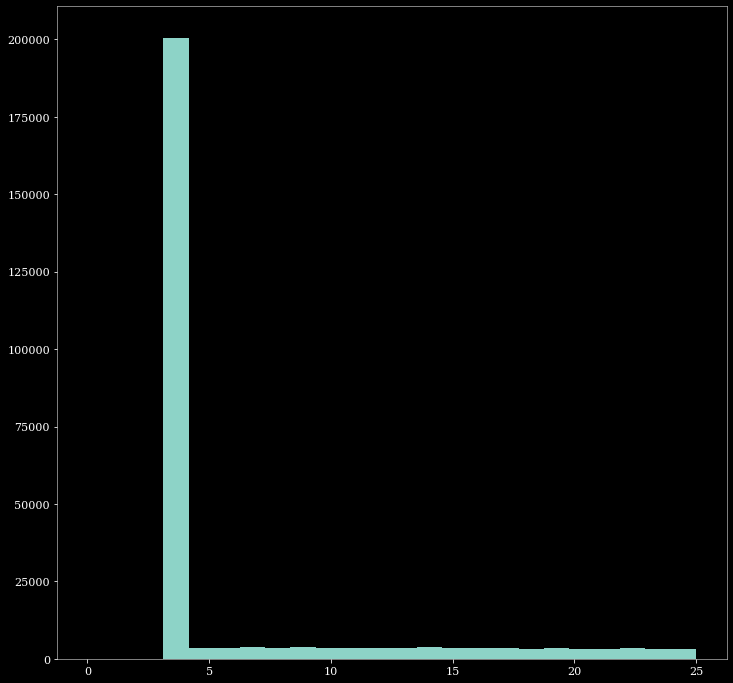

In [162]:
pl.figure(figsize=(12,12))
pl.hist(fitinfo.av.value, bins=np.linspace(0,25,25))

(array([     0.,      0.,      0., 200860.,   3549.,   3581.,   3540.,
          3391.,   3689.,   3668.,   3519.,   3174.,   3328.,   3514.,
          3302.,   3297.,   3399.,   3250.,   3278.,   3234.,   3117.,
          3076.,   2807.,   2945.]),
 array([ 0.        ,  1.04166667,  2.08333333,  3.125     ,  4.16666667,
         5.20833333,  6.25      ,  7.29166667,  8.33333333,  9.375     ,
        10.41666667, 11.45833333, 12.5       , 13.54166667, 14.58333333,
        15.625     , 16.66666667, 17.70833333, 18.75      , 19.79166667,
        20.83333333, 21.875     , 22.91666667, 23.95833333, 25.        ]),
 <BarContainer object of 24 artists>)

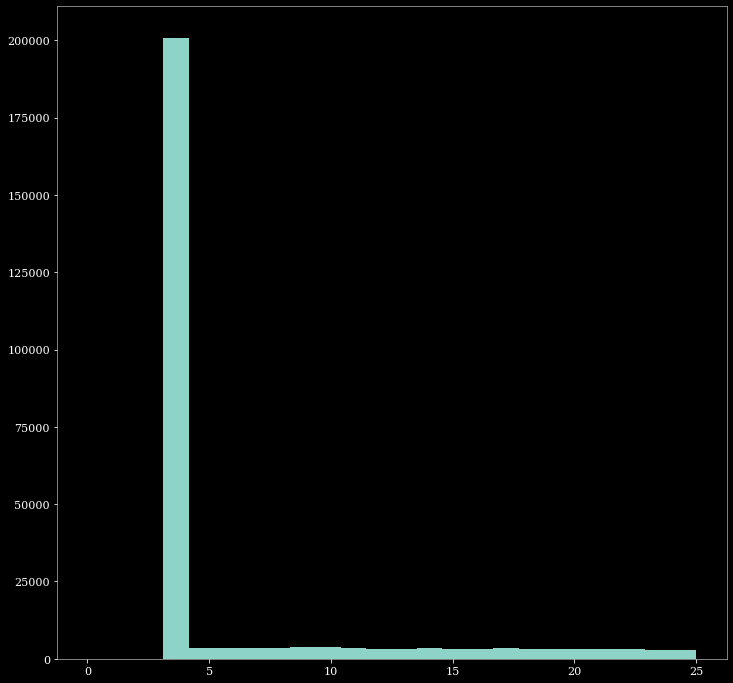

In [163]:
pl.figure(figsize=(12,12))
pl.hist(spubhmi_fitinfo.av.value, bins=np.linspace(0,25,25))

(0.0, 10000.0)

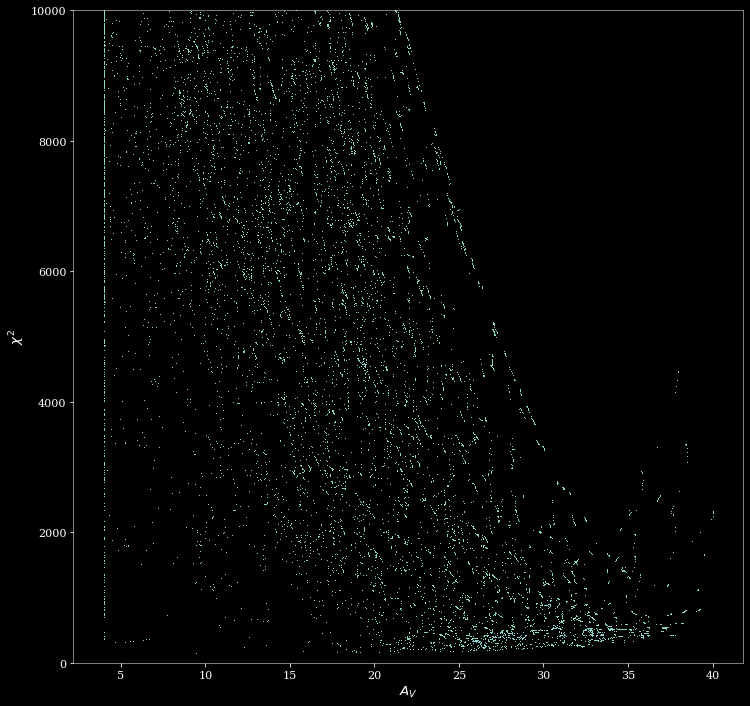

In [164]:
pl.figure(figsize=(12,12))
pl.plot(spubhmi_fitinfo.av.value, spubhmi_fitinfo.chi2, ',')
pl.xlabel("$A_V$")
pl.ylabel("$\chi^2$")
pl.ylim(0,10000)

Text(0, 0.5, 'distance scaling ($\\propto d^2$)')

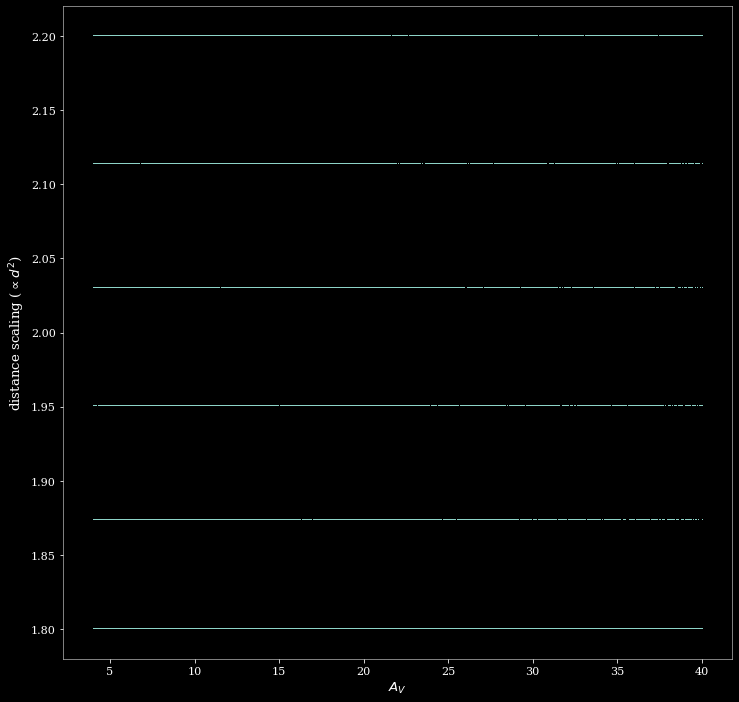

In [165]:
pl.figure(figsize=(12,12))
pl.plot(spubhmi_fitinfo.av.value, 10**spubhmi_fitinfo.sc, ',')
pl.xlabel("$A_V$")
pl.ylabel("distance scaling ($\propto d^2$)")

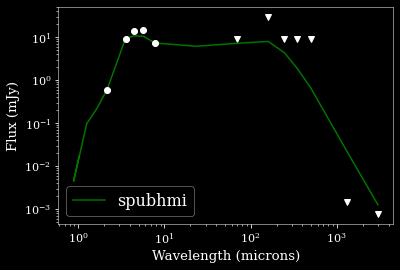

In [167]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

_=pl.plot(wavelengths.value,
          (10**spubhmi_fitinfo.model_fluxes[np.nanargmin(spubhmi_fitinfo.chi2), :].T),
          alpha=0.9, color='g', label='spubhmi')
# _=pl.plot(wavelengths.value,
#           (10**s_p_smi_fitinfo.model_fluxes[np.nanargmin(s_p_smi_fitinfo.chi2), :].T),
#           alpha=0.9, color='r', label='s-p-smi')
_=pl.loglog()
pl.legend(loc='best')
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")